In [10]:
import os
os.getcwd()

'/Users/christiansmacbookair/Projects/PlantWater/src'

In [14]:
from firebase_admin import firestore

# Initialize Firestore client
db = firestore.Client.from_service_account_json("/Users/christiansmacbookair/Projects/PlantWater/src/sensor/serviceAccountKey.json")
PLANTS_COLLECTION = 'plants'
DATA_COLLECTION = 'data'


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to store data from all plants
all_plants_data = []

# Fetch all plants
plants = db.collection(PLANTS_COLLECTION).stream()

# Loop through each plant and fetch its data
for plant_ref in plants:
    plant_id = plant_ref.id
    
    # Fetch data for the plant's subcollection
    data_ref = db.collection(PLANTS_COLLECTION).document(plant_id).collection(DATA_COLLECTION)
    plant_data = data_ref.stream()
    
    # Convert data to a list of dictionaries and add plant ID for identification
    for doc in plant_data:
        doc_dict = doc.to_dict()
        doc_dict['plant_id'] = plant_id  # Include plant ID in the data
        all_plants_data.append(doc_dict)

# Convert the aggregated data to a DataFrame
all_data_df = pd.DataFrame(all_plants_data)

# If you want to inspect the data
print(all_data_df.head())


   value                        timestamp              plant_id
0  -2314 2024-12-08 01:24:50.461000+00:00  2yeS5lnwrv92hv79bEk4
1  -1029 2024-12-28 23:16:52.772000+00:00  2yeS5lnwrv92hv79bEk4
2  -3599 2024-12-25 08:44:00.455000+00:00  2yeS5lnwrv92hv79bEk4
3 -17477 2025-01-11 09:25:25.825000+00:00  2yeS5lnwrv92hv79bEk4
4  -1286 2025-01-11 19:56:56.138000+00:00  2yeS5lnwrv92hv79bEk4


In [27]:
# Save the DataFrame as a CSV file
output_csv_path = "/Users/christiansmacbookair/Projects/PlantWater/data/all_plants_data.csv"  # Specify your desired file name and path
all_data_df.to_csv(output_csv_path, index=False)
print(f"DataFrame saved as CSV to {output_csv_path}")

(166524, 3)

In [142]:
all_data_df = pd.read_csv('/Users/christiansmacbookair/Projects/PlantWater/data/all_plants_data.csv')
all_data_df.head()

,value,timestamp,plant_id
0,-2314,2024-12-08 01:24:50.461000+00:00,2yeS5lnwrv92hv79bEk4
1,-1029,2024-12-28 23:16:52.772000+00:00,2yeS5lnwrv92hv79bEk4
2,-3599,2024-12-25 08:44:00.455000+00:00,2yeS5lnwrv92hv79bEk4
3,-17477,2025-01-11 09:25:25.825000+00:00,2yeS5lnwrv92hv79bEk4
4,-1286,2025-01-11 19:56:56.138000+00:00,2yeS5lnwrv92hv79bEk4


In [143]:
print(all_data_df.dtypes)

value         int64
timestamp    object
plant_id     object
dtype: object


In [147]:
all_data_df['timestamp'] = pd.to_datetime(all_data_df['timestamp'], format = 'mixed')
print(all_data_df.head())

   value                        timestamp              plant_id
0  -2314 2024-12-08 01:24:50.461000+00:00  2yeS5lnwrv92hv79bEk4
1  -1029 2024-12-28 23:16:52.772000+00:00  2yeS5lnwrv92hv79bEk4
2  -3599 2024-12-25 08:44:00.455000+00:00  2yeS5lnwrv92hv79bEk4
3 -17477 2025-01-11 09:25:25.825000+00:00  2yeS5lnwrv92hv79bEk4
4  -1286 2025-01-11 19:56:56.138000+00:00  2yeS5lnwrv92hv79bEk4


In [157]:
# Convert the comparison string to a datetime object with the same timezone
comparison_date = pd.to_datetime('2025-01-01').tz_localize('UTC')
# Filter the DataFrame
all_data_df = all_data_df[all_data_df['timestamp'] > comparison_date]
all_data_df.head()
print(all_data_df.dtypes)

value                      int64
timestamp    datetime64[ns, UTC]
plant_id                  object
day                        int32
month                      int32
hour                       int32
dtype: object


In [158]:

all_data_df['day'] = all_data_df.timestamp.dt.day
all_data_df['month'] = all_data_df.timestamp.dt.month
all_data_df['hour'] = all_data_df.timestamp.dt.hour
all_data_df.head()

,value,timestamp,plant_id,day,month,hour
3,-17477,2025-01-11 09:25:25.825000+00:00,2yeS5lnwrv92hv79bEk4,11,1,9
4,-1286,2025-01-11 19:56:56.138000+00:00,2yeS5lnwrv92hv79bEk4,11,1,19
7,-1800,2025-01-13 18:22:29.555000+00:00,2yeS5lnwrv92hv79bEk4,13,1,18
8,-1029,2025-01-03 00:16:36.673000+00:00,2yeS5lnwrv92hv79bEk4,3,1,0
9,-1029,2025-01-13 04:32:55.056000+00:00,2yeS5lnwrv92hv79bEk4,13,1,4


In [159]:
hourly_avg_df = all_data_df.groupby(['month','day', 'hour', 'plant_id'])['value'].mean().reset_index()
hourly_avg_df.head()

,month,day,hour,plant_id,value
0,1,1,0,2yeS5lnwrv92hv79bEk4,-1029.0
1,1,1,0,5ZliEQTCrlgTgDUBBx6v,-1029.0
2,1,1,0,YcV4AKO8l7ETZ66bY2l7,-1029.0
3,1,1,1,2yeS5lnwrv92hv79bEk4,-1029.0
4,1,1,1,5ZliEQTCrlgTgDUBBx6v,-1029.0


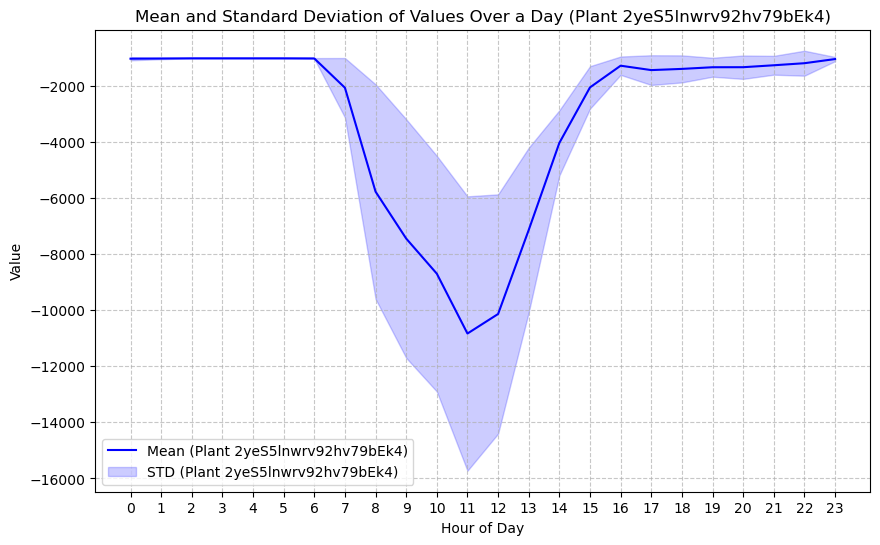

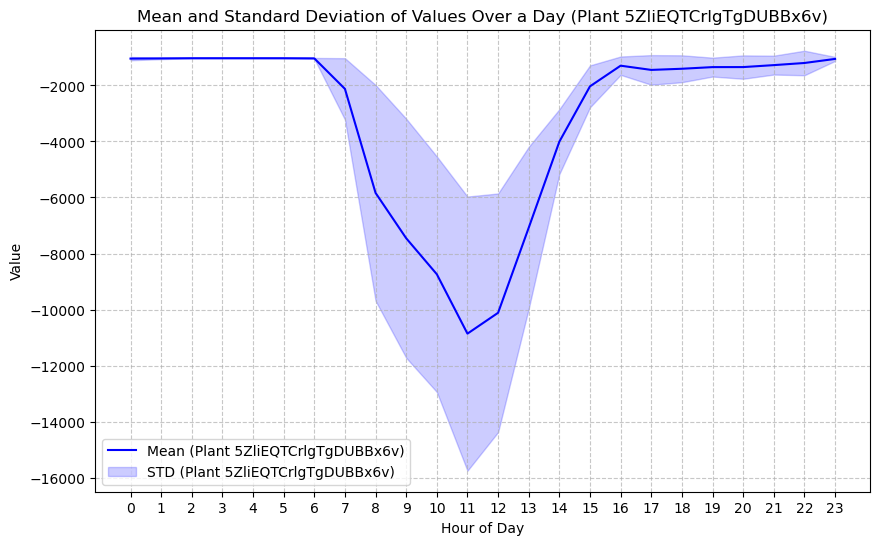

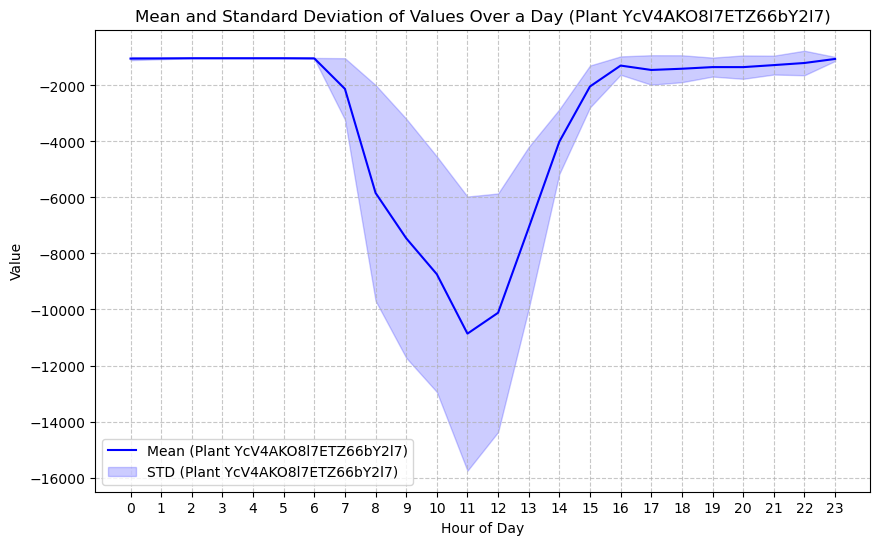

In [160]:
# Group by plant_id and hour, calculate mean and standard deviation
hourly_stats = (
    hourly_avg_df
    .groupby(['plant_id', 'hour'])
    .agg(mean_value=('value', 'mean'), std_value=('value', 'std'))
    .reset_index()
)

# Plot mean and standard deviation for each plant
for plant_id, plant_data in hourly_stats.groupby('plant_id'):
    plt.figure(figsize=(10, 6))
    
    # Plot mean as a line
    plt.plot(
        plant_data['hour'], 
        plant_data['mean_value'], 
        label=f'Mean (Plant {plant_id})', 
        color='blue', 
        linestyle='-'
    )
    
    # Plot standard deviation as shaded area
    plt.fill_between(
        plant_data['hour'], 
        plant_data['mean_value'] - plant_data['std_value'], 
        plant_data['mean_value'] + plant_data['std_value'], 
        color='blue', 
        alpha=0.2, 
        label=f'STD (Plant {plant_id})'
    )
    
    plt.title(f'Mean and Standard Deviation of Values Over a Day (Plant {plant_id})')
    plt.xlabel('Hour of Day')
    plt.ylabel('Value')
    plt.xticks(range(24))  # Set x-axis ticks to hours
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()


In [184]:
filtered_data = hourly_avg_df.query("hour >= 0")
filtered_data.head()

,month,day,hour,plant_id,value
0,1,1,0,2yeS5lnwrv92hv79bEk4,-1029.0
1,1,1,0,5ZliEQTCrlgTgDUBBx6v,-1029.0
2,1,1,0,YcV4AKO8l7ETZ66bY2l7,-1029.0
3,1,1,1,2yeS5lnwrv92hv79bEk4,-1029.0
4,1,1,1,5ZliEQTCrlgTgDUBBx6v,-1029.0


In [185]:
# Use 'hour' as the x-axis labels
filtered_data['date'] = pd.to_datetime(
    {'year': 2025, 'month': filtered_data['month'], 'day': filtered_data['day'], 'hour': filtered_data['hour']}
)
filtered_data.head()

,month,day,hour,plant_id,value,date
0,1,1,0,2yeS5lnwrv92hv79bEk4,-1029.0,2025-01-01 00:00:00
1,1,1,0,5ZliEQTCrlgTgDUBBx6v,-1029.0,2025-01-01 00:00:00
2,1,1,0,YcV4AKO8l7ETZ66bY2l7,-1029.0,2025-01-01 00:00:00
3,1,1,1,2yeS5lnwrv92hv79bEk4,-1029.0,2025-01-01 01:00:00
4,1,1,1,5ZliEQTCrlgTgDUBBx6v,-1029.0,2025-01-01 01:00:00


In [187]:
# Define vertical line dates
vline_dates = [
    pd.to_datetime("2025-01-03 20:00"),
    pd.to_datetime("2025-01-11 13:00"),
]

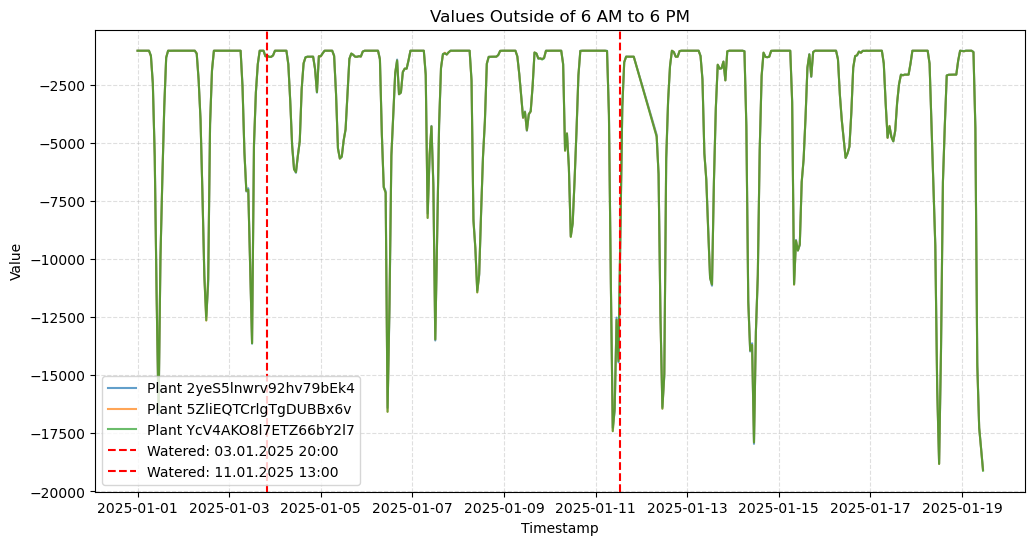

In [189]:
# Plot the filtered data
plt.figure(figsize=(12, 6))
for plant_id, plant_data in filtered_data.groupby('plant_id'):
    plt.plot(
        plant_data['date'],
        plant_data['value'],
        label=f'Plant {plant_id}',
        alpha = 0.7
    )

# Customize the x-axis to display 'day_hour'
'''plt.xticks(
    ticks = plant_data['x'][::4],  # Sequential ticks
    labels=plant_data['date_label'][::4],  # Use day and hour as labels
    rotation=45, 
    fontsize=8
)'''
# Add vertical lines

for vline_date in vline_dates:
    plt.axvline(x=vline_date, color='red', linestyle='--', label=f'Watered: {vline_date.strftime("%d.%m.%Y %H:%M")}')

#plt.ylim(-1500, -1000)
plt.title('Values Outside of 6 AM to 6 PM')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [118]:
[*range(0,93)][::3]

[0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 30,
 33,
 36,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90]